In [1]:
from cshd import plot_pheno, calc_phenometrics, params_phenometrics, cshd_array, smooth_timeseries
import pandas as pd

In [2]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1,
    date_format='yyyy-mm-dd'
)


In [3]:
soja3 = [3243,3063,3175,4635,5723,1225,6299,3940,5445,7160,6518,8832,8962,8485,7600,-91,6381,5383,5338,2608,3015,1181,3223]

In [4]:
ndvi_array = cshd_array(
    timeserie=smooth_timeseries(soja3, method='savitsky'),
    start_date='2023-01-01',
    freq='16D'
)

In [5]:
ds_phenos = calc_phenometrics(
    da=ndvi_array,
    engine='phenolopy',
    config=config,
    start_date='2023-01-01'
)

Initialising calculation of phenometrics.

Beginning extraction of CRS metadata.
> Extracting CRS metadata.
> No CRS metadata found. Returning None.

Beginning calculation of phenometrics. This can take awhile - please wait.

Beginning calculation of peak of season (pos) values and times.
> Calculating peak of season (pos) values.
> Calculating peak of season (pos) times.
> Success!

Beginning calculation of valley of season (vos) values and times.
> Calculating valley of season (vos) values.
> Calculating valley of season (vos) times.
> Success!

Beginning calculation of middle of season (mos) values (times not possible).
> Calculating middle of season (mos) values.
> Success!

Beginning calculation of base (bse) values (times not possible).
> Calculating base (bse) values.
> Success!

Beginning calculation of amplitude of season (aos) values (times not possible).
> Calculating amplitude of season (aos) values.
> Success!

Beginning calculation of start of season (sos) values and time

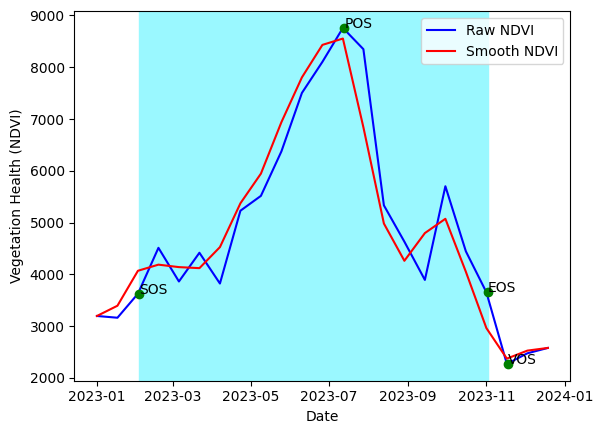

In [6]:
dates_datetime64 = pd.date_range(pd.to_datetime('2023-01-01', format='%Y-%m-%d'), periods=len(soja3), freq="16D")
plot_pheno(
    dict(start_date='2023-01-01'), 
    dict(phenometrics=ds_phenos,timeseries= dict(values=smooth_timeseries(soja3, method='savitsky'), timeline=dates_datetime64))
)